# __Bank Marketing__

### Informasi Dataset

Data ini berkaitan dengan kampanye pemasaran langsung dari Lembaga Perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan berlangganan ya atau tidak.

### Informasi Atribut

__Input variables:__
<br> <br>
bank client data: <br>
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
<br>
related with the last contact of the current campaign: <br>
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') <br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
<br>
other attributes: <br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
<br>
social and economic context attributes: <br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) <br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric) <br>
20 - nr.employed: number of employees - quarterly indicator (numeric) <br>
<br><br>
__Output variable (desired target):__ <br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

---

Import Library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


## Data Preprocessing

Data yang digunakan adalah bank-additional-full

In [2]:
# Buka data
df = pd.read_csv("bank-additional-full.csv", sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Memeriksa tipe data dan jumlah data non-null setiap atribut

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Mengelompokkan atribut berdasarkan tipe data

In [4]:
numerical= list(df.select_dtypes(include=['int64']).columns.values) + list(df.select_dtypes(include=['float64']).columns.values)
numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [5]:
categorical = list(df.select_dtypes(include=['object']))
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

Mengeluarkan 'y' sebagai target

In [6]:
categorical.pop()

'y'

## Data Cleaning

Memeriksa unique value pada atribut numerical

In [7]:
for numberical_col in numerical:
    print("Nilai unik untuk kolom ", numberical_col.upper())
    print(df[numberical_col].unique())

Nilai unik untuk kolom  AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Nilai unik untuk kolom  DURATION
[ 261  149  226 ... 1246 1556 1868]
Nilai unik untuk kolom  CAMPAIGN
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Nilai unik untuk kolom  PDAYS
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Nilai unik untuk kolom  PREVIOUS
[0 1 2 3 4 5 6 7]
Nilai unik untuk kolom  EMP.VAR.RATE
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Nilai unik untuk kolom  CONS.PRICE.IDX
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.7

In [8]:
df.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

Terdapat nilai yang aneh yaitu 999 di atribut pdays

Mengubah nilai 999 menjadi 0

In [9]:
df['pdays'].replace(999,0,inplace=True)

Memeriksa unique value pada atribut categorical

In [10]:
for categorical_col in categorical:
    print("Nilai unik untuk kolom ", categorical_col.upper())
    print(df[categorical_col].unique())

Nilai unik untuk kolom  JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Nilai unik untuk kolom  MARITAL
['married' 'single' 'divorced' 'unknown']
Nilai unik untuk kolom  EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Nilai unik untuk kolom  DEFAULT
['no' 'unknown' 'yes']
Nilai unik untuk kolom  HOUSING
['no' 'yes' 'unknown']
Nilai unik untuk kolom  LOAN
['no' 'yes' 'unknown']
Nilai unik untuk kolom  CONTACT
['telephone' 'cellular']
Nilai unik untuk kolom  MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Nilai unik untuk kolom  DAY_OF_WEEK
['mon' 'tue' 'wed' 'thu' 'fri']
Nilai unik untuk kolom  POUTCOME
['nonexistent' 'failure' 'success']


Ada nilai "unknown" yang dinyatakan sebagai nilai yang aneh

Mengubah "unknown" menjadi nilai nan

In [11]:
df[df[categorical]=="unknown"] = np.nan

Memeriksa jumlah missing value

In [12]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Membuang missing value

In [13]:
df.dropna(inplace=True)

## Exploratory Data Analysis

Memeriksa jumlah data setiap kelas

In [14]:
df['y'].value_counts()

no     26629
yes     3859
Name: y, dtype: int64

Distribusi kelas target 'yes' dan 'no'

Text(0.5, 0, 'Kelas Target')

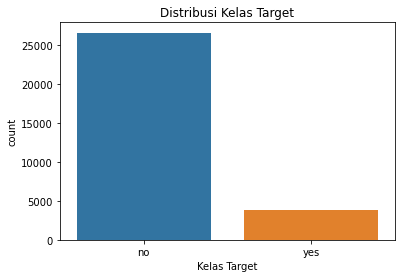

In [15]:
sns.countplot(x=df['y'])
plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas Target')

Membandingkan jumlah target yang berlangganan dan tidak pada setiap kategori

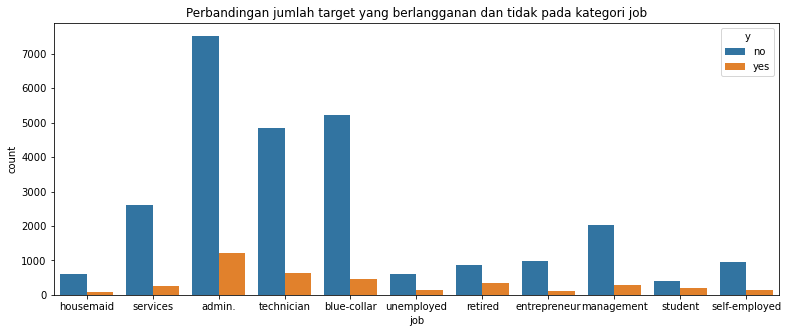

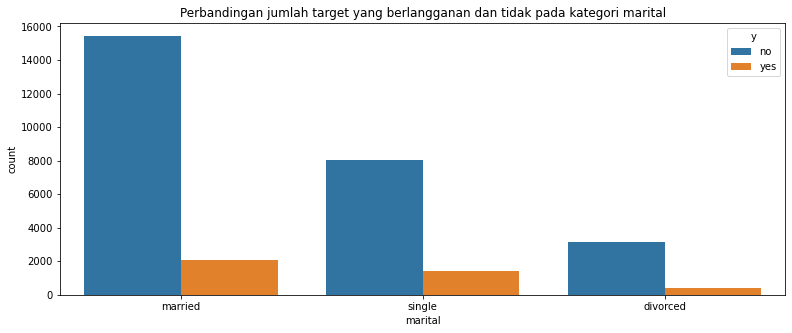

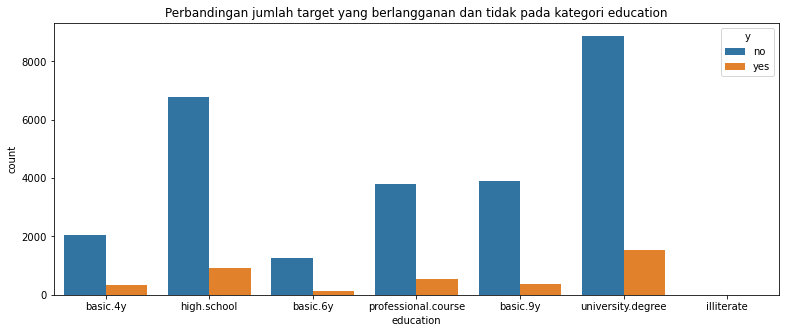

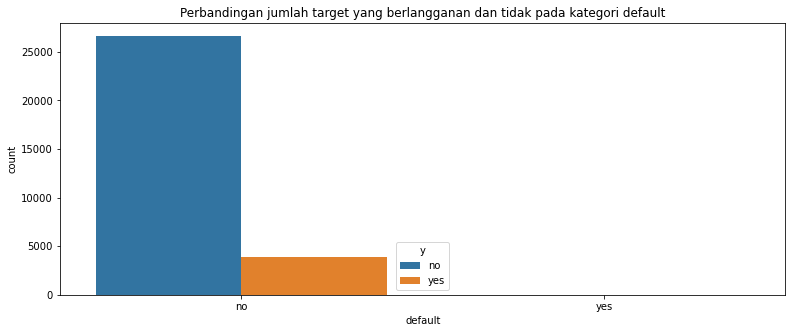

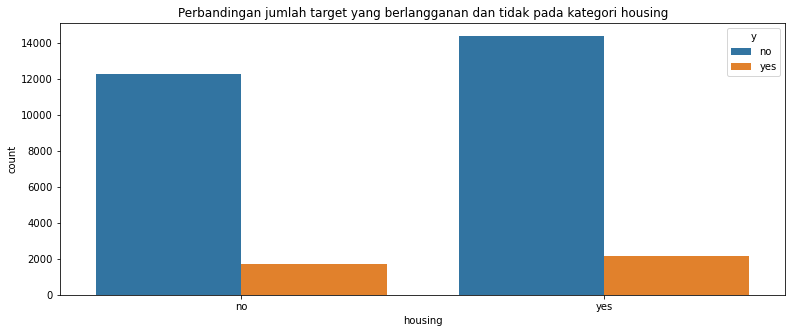

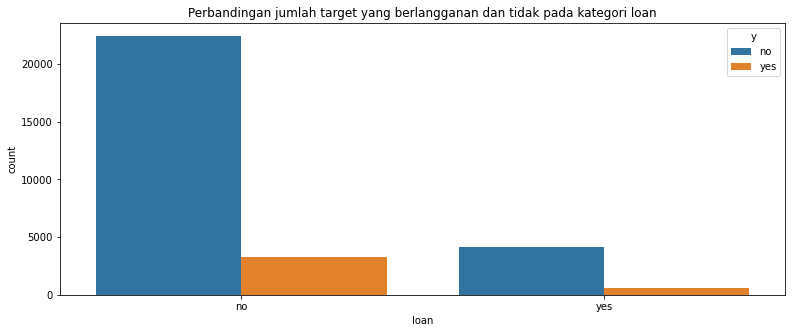

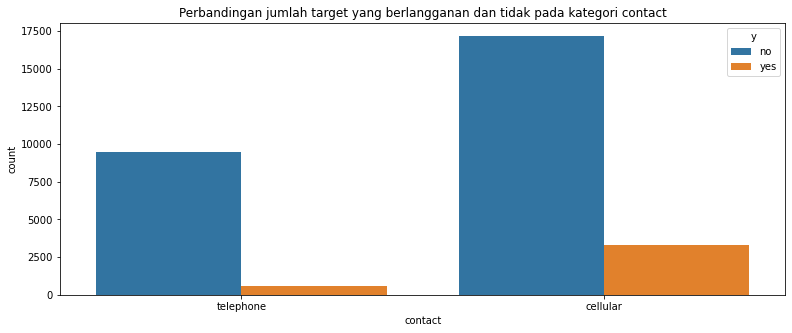

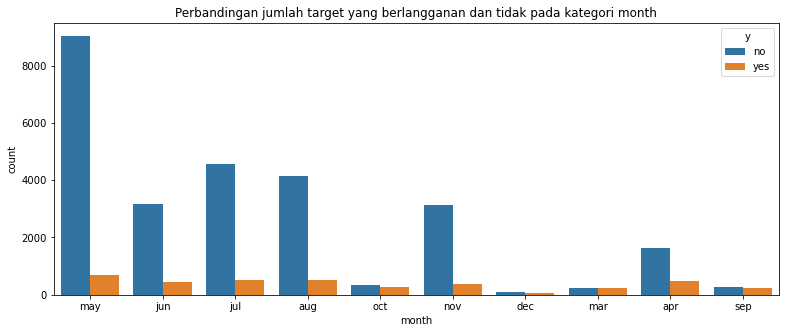

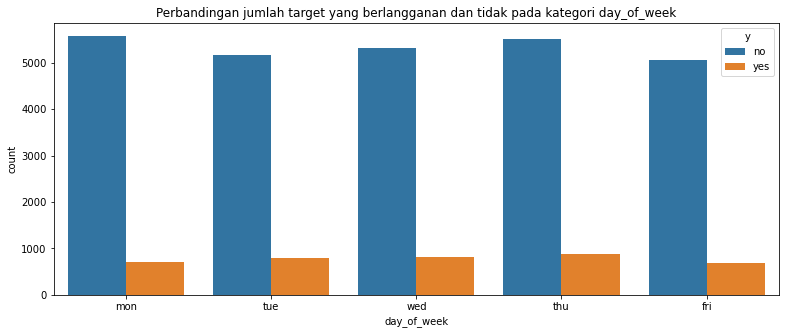

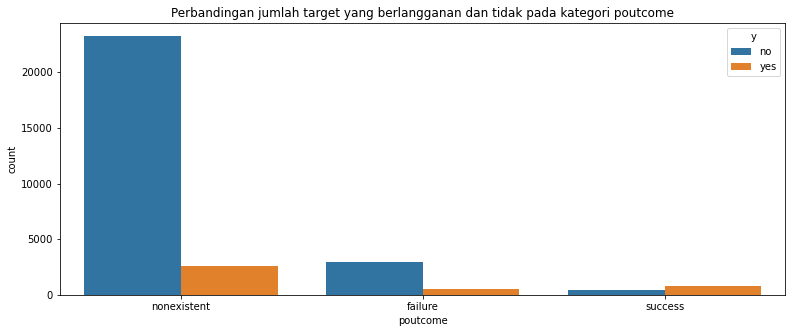

In [16]:
for category_col in categorical:
    plt.figure(figsize=(13, 5))
    plt.title('Perbandingan jumlah target yang berlangganan dan tidak pada kategori '+ category_col)
    ax = sns.countplot(x = df[category_col], hue=df["y"])

Pada kategori 'default' semua nilai adalah 'no', maka 'default' dapat dihapus

In [17]:
del df['default']

Menghapus 'default' pada list categorical

In [18]:
categorical.remove('default')

Jumlah target yang berlangganan dan tidak per kategori umur

<AxesSubplot:title={'center':'Perbandingan jumlah target yang berlangganan dan tidak per kategori umur'}, xlabel='age_group', ylabel='count'>

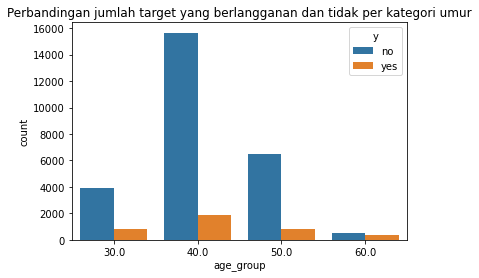

In [19]:
age_lst = [df]
for ages in age_lst:
    ages.loc[ages["age"] < 30,  'age_group'] = 30
    ages.loc[(ages["age"] >= 30) & (ages["age"] <= 44), 'age_group'] = 40
    ages.loc[(ages["age"] >= 45) & (ages["age"] <= 59), 'age_group'] = 50
    ages.loc[ages["age"] >= 60, 'age_group'] = 60

hit_age = pd.crosstab(df['y'],df['age_group']).apply(lambda x: x/x.sum() * 100)
hit_age = hit_age.transpose()

plt.title('Perbandingan jumlah target yang berlangganan dan tidak per kategori umur')
sns.countplot(x='age_group', data=df, hue='y')

Jumlah target yang berlangganan dan tidak berdasarkan durasi terakhir dikontak

Text(0.5, 0, 'Target')

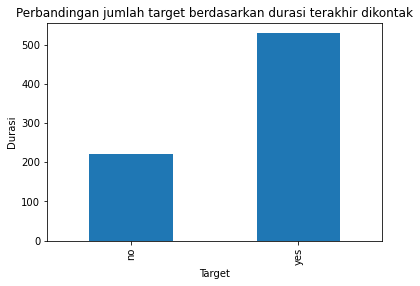

In [20]:
df.groupby('y')['duration'].mean().plot.bar()
plt.title("Perbandingan jumlah target berdasarkan durasi terakhir dikontak")
plt.ylabel("Durasi")
plt.xlabel("Target")

Correlation matrix dari kategori numerical

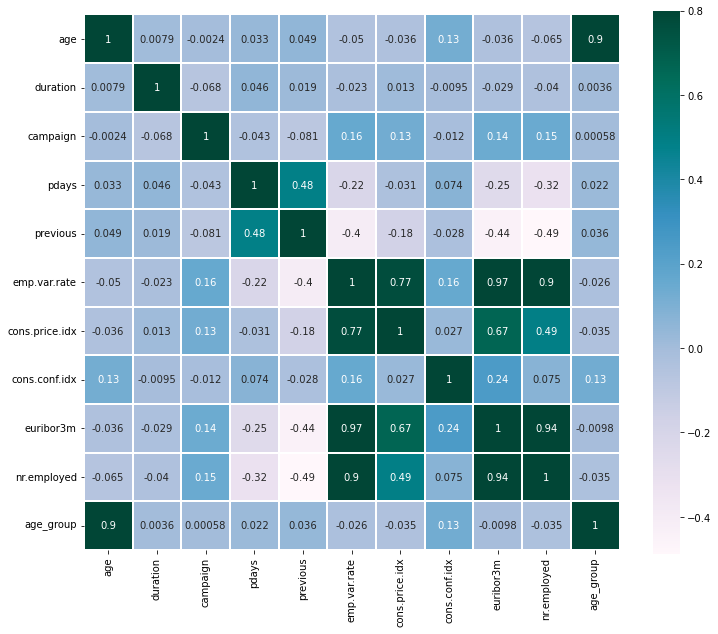

In [21]:
def drawheatmap(df):
    matrix = df.corr()
    f, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(matrix, vmax=.8, square=True, cmap='PuBuGn', ax=ax, annot=True, linewidth=0.1)

drawheatmap(df)

## Encoding Data

Encode data target

In [22]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

Encode data categorical

In [23]:
for catcol in categorical:
    dummies = pd.get_dummies(df[catcol], prefix=catcol, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([catcol], axis = 1)

## Split Data Train dan Data Test

In [24]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling data

In [25]:
minmax_scaler = MinMaxScaler()

numeric_col= ['age','duration','campaign','previous','cons.conf.idx','euribor3m']

#fit and transform scaler to train
X_train.loc[:,numeric_col] = minmax_scaler.fit_transform(X_train.loc[:,numeric_col])

#transform the test data, using scaler that only scaling the data train to avoid data leakage
X_test.loc[:,numeric_col] = minmax_scaler.transform(X_test.loc[:,numeric_col])

Menampilkan X_train

In [26]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
13510,0.243590,0.033341,0.000000,0,0.000000,1.4,93.918,0.338912,0.981410,5228.1,...,0,0,0,0,0,1,0,0,1,0
19974,0.269231,0.201953,0.000000,0,0.000000,1.4,93.444,0.615063,0.982090,5228.1,...,0,0,0,0,0,0,0,0,1,0
32016,0.435897,0.010241,0.023810,0,0.142857,-1.8,92.893,0.192469,0.157107,5099.1,...,1,0,0,0,0,1,0,0,0,0
16853,0.487179,0.031912,0.000000,0,0.000000,1.4,93.918,0.338912,0.981183,5228.1,...,0,0,0,0,0,1,0,0,1,0
28160,0.333333,0.054775,0.000000,0,0.000000,-1.8,93.075,0.154812,0.188619,5099.1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40416,0.307692,0.061443,0.023810,6,0.428571,-1.7,94.027,0.523013,0.061437,4991.6,...,0,0,0,0,0,0,0,0,0,1
8494,0.346154,0.005954,0.000000,0,0.000000,1.4,94.465,0.376569,0.958966,5228.1,...,0,0,0,0,0,0,0,1,1,0
1415,0.474359,0.047630,0.023810,0,0.000000,1.1,93.994,0.602510,0.956926,5191.0,...,1,0,0,0,0,1,0,0,1,0
23532,0.423077,0.020005,0.238095,0,0.000000,1.4,93.444,0.615063,0.981183,5228.1,...,0,0,0,0,0,1,0,0,1,0


Menampilkan X_test

In [27]:
X_test

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
8688,0.128205,0.042629,0.000000,0,0.000000,1.4,94.465,0.376569,0.958966,5228.1,...,0,0,0,0,0,0,0,1,1,0
18409,0.128205,0.120981,0.000000,0,0.000000,1.4,93.918,0.338912,0.982544,5228.1,...,0,0,0,0,0,1,0,0,1,0
18374,0.256410,0.193379,0.023810,0,0.000000,1.4,93.918,0.338912,0.982544,5228.1,...,0,0,0,0,0,1,0,0,1,0
39804,0.153846,0.053822,0.023810,6,0.142857,-1.7,94.055,0.460251,0.015869,4991.6,...,0,0,0,0,0,0,0,1,0,1
10746,0.141026,0.096690,0.047619,0,0.000000,1.4,94.465,0.376569,0.980957,5228.1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,0.166667,0.024053,0.000000,0,0.000000,1.1,93.994,0.602510,0.957153,5191.0,...,1,0,0,0,0,0,1,0,1,0
22951,0.192308,0.013337,0.023810,0,0.000000,1.4,93.444,0.615063,0.981864,5228.1,...,0,0,0,0,1,0,0,0,1,0
27333,0.294872,0.013813,0.000000,0,0.142857,-0.1,93.200,0.368201,0.767853,5195.8,...,0,1,0,0,0,0,0,0,0,0
20781,0.307692,0.018100,0.000000,0,0.000000,1.4,93.444,0.615063,0.981864,5228.1,...,0,0,0,0,0,0,0,1,1,0


## Training Model

Logistic Regression

In [28]:
lr=LogisticRegression(max_iter=1100)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1100)

K-Nearest Neighbors

In [29]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

Support Vector Machine

In [30]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

Decision Tree

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Random Forest

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Naive Bayes

In [33]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

## Testing Data

Untuk menyimpan hasil akurasi

In [34]:
akurasi = []

Logistic Regression

In [35]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
akurasi.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5304
           1       0.67      0.36      0.47       794

    accuracy                           0.89      6098
   macro avg       0.79      0.66      0.70      6098
weighted avg       0.88      0.89      0.88      6098



K-Nearest Neighbors

In [36]:
y_pred = kn.predict(X_test)
print(classification_report(y_test, y_pred))
akurasi.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5304
           1       0.56      0.30      0.39       794

    accuracy                           0.88      6098
   macro avg       0.73      0.63      0.66      6098
weighted avg       0.86      0.88      0.86      6098



Support Vector Machine

In [37]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
akurasi.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5304
           1       0.62      0.16      0.26       794

    accuracy                           0.88      6098
   macro avg       0.75      0.57      0.60      6098
weighted avg       0.85      0.88      0.85      6098



Decision Tree

In [38]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
akurasi.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5304
           1       0.53      0.52      0.52       794

    accuracy                           0.88      6098
   macro avg       0.73      0.72      0.73      6098
weighted avg       0.88      0.88      0.88      6098



Random Forest

In [39]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
akurasi.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5304
           1       0.66      0.47      0.55       794

    accuracy                           0.90      6098
   macro avg       0.79      0.72      0.75      6098
weighted avg       0.89      0.90      0.89      6098



Naive Bayes

In [40]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))
akurasi.append(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5304
           1       0.46      0.47      0.47       794

    accuracy                           0.86      6098
   macro avg       0.69      0.69      0.69      6098
weighted avg       0.86      0.86      0.86      6098



Membuat dataframe untuk hasil akurasi

In [41]:
models = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naive bayes']
akurasi_skor = {'Metode':models, 'Akurasi':akurasi}
akurasi_skor = pd.DataFrame(akurasi_skor)

In [42]:
akurasi_skor

,Metode,Akurasi
0,Logistic Regression,0.893736
1,KNN,0.878157
2,SVM,0.878157
3,Decision Tree,0.878157
4,Random Forest,0.899311
5,Naive bayes,0.860282


Memvisualisasikan perbandingan akurasi setiap metode

Text(0.5, 0, 'Akurasi')

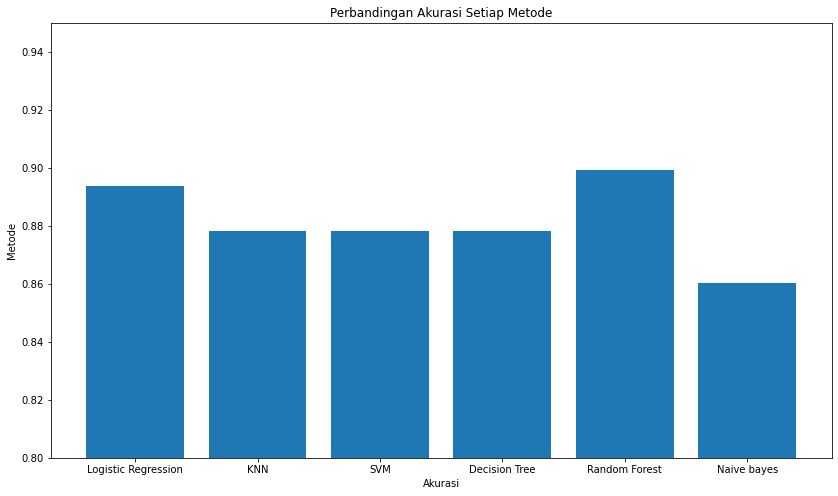

In [43]:
plt.subplots(figsize=(14, 8))
plt.bar(akurasi_skor['Metode'], akurasi_skor['Akurasi'])
plt.ylim(0.8, 0.95)
plt.title("Perbandingan Akurasi Setiap Metode")
plt.ylabel("Metode")
plt.xlabel("Akurasi")

## Analisis

Berdasarkan ekplorasi dan hasil pemodelan pada data didapatkan hasil:
- Hasil akurasi Random Forest dan Logistic Regression adalah yang terbaik yaitu pada angka 90%.
- Akurasi dari KNN, SVM, dan Decision Tree juga mendapatkan performa yang baik yaitu 88%.
- Naive Bayes menghasilkan performa akurasi terendah, tetapi masih baik.